**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE:
 1. Andrea Xcaret Gomez Alfaro
 2. Jose de Jesus N. Zuniga Gonzalez
 3. Emiliano Palafox Ruiz
 4. Miguel Ángel Bustamante Pérez

*   MATRÍCULA:
 1. A01796384
 2. A00669728
 3. A01796609
 4. A01781583

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y analítica de datos"
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cars_df = pd.read_csv('vehicles.csv')

In [5]:
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [7]:
cols_to_drop = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long']
cars_df_clean = cars_df.drop(columns=cols_to_drop)

In [8]:
cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
dtypes: f

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [9]:
num_observations = cars_df_clean.shape[0]
num_columns = cars_df_clean.shape[1]

In [10]:
print('El número de registros del dataframe es:', num_observations)
print('El número de columnas del dataframe es:', num_columns)

El número de registros del dataframe es: 426880
El número de columnas del dataframe es: 18


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [11]:
percentage = (cars_df_clean.isnull().sum() / len(cars_df_clean)) * 100
missing_data_df = pd.DataFrame({
    '% de valores faltantes': percentage
})

print("\nPorcentaje de valores faltantes por columna:\n")
missing_data_df.head(18)


Porcentaje de valores faltantes por columna:



,% de valores faltantes
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [12]:
cars_df_clean = cars_df_clean.dropna(axis=1, thresh=0.7 * len(cars_df_clean))

In [13]:
cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [14]:
percentage = (cars_df_clean.isnull().sum() / len(cars_df_clean)) * 100
missing_data_df = pd.DataFrame({
    '% de valores faltantes': percentage
})
print("\nPorcentaje de valores faltantes por columna:\n")
print(missing_data_df.head(18))


Porcentaje de valores faltantes por columna:

              % de valores faltantes
region                      0.000000
region_url                  0.000000
price                       0.000000
year                        0.282281
manufacturer                4.133714
model                       1.236179
fuel                        0.705819
odometer                    1.030735
title_status                1.930753
transmission                0.598763
type                       21.752717
state                       0.000000


In [15]:
# Identificamos aquellas columnas con menos del 5% de faltantes
cols_less_5 = missing_data_df[missing_data_df['% de valores faltantes'] < 5].index
print(cols_less_5)

Index(['region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'fuel', 'odometer', 'title_status', 'transmission', 'state'],
      dtype='object')


In [16]:
# Hacemos el conteo de cuantos registros teníamos antes del borrado
count_initial = cars_df_clean.shape[0]
# Eliminamos las filas con NaN de las columnas seleccionadas
cars_df_clean_2 = cars_df_clean.dropna(subset=cols_less_5)

In [17]:
# Verificamos que se hayan eliminado esos registros
percentage = (cars_df_clean_2.isnull().sum() / len(cars_df_clean)) * 100
missing_data_df = pd.DataFrame({
    '% de valores faltantes': percentage
})
print("\nPorcentaje de valores faltantes por columna:\n")
print(missing_data_df.head(18))


Porcentaje de valores faltantes por columna:

              % de valores faltantes
region                      0.000000
region_url                  0.000000
price                       0.000000
year                        0.000000
manufacturer                0.000000
model                       0.000000
fuel                        0.000000
odometer                    0.000000
title_status                0.000000
transmission                0.000000
type                       19.356259
state                       0.000000


In [18]:
# Hacemos el conteo de cuantos registros tenemos ahora
count_final = cars_df_clean_2.shape[0]
# Calculamos el porcentaje de registros eliminados
percentage_rows = ((count_initial - count_final)/count_initial)*100
print(f"El porcentaje de registros eliminados fue de: {percentage_rows:.2f}%")

El porcentaje de registros eliminados fue de: 8.73%


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

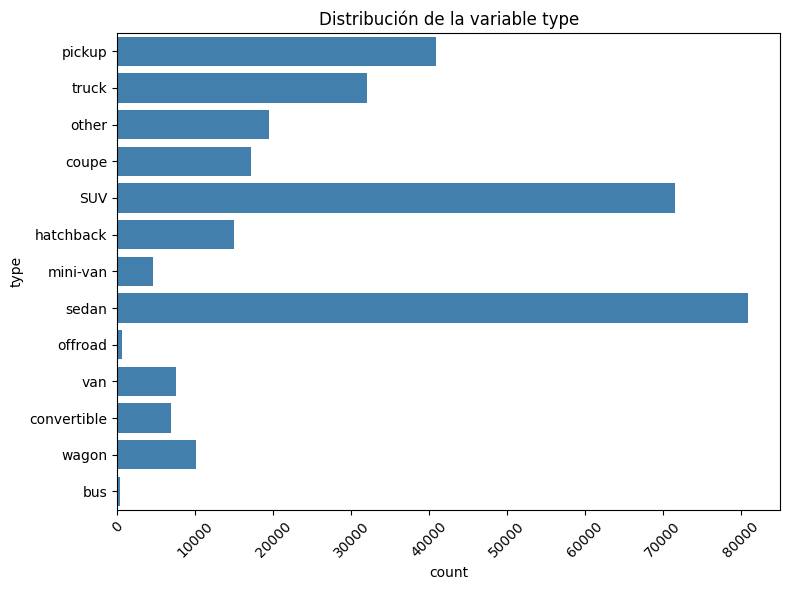

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cars_df_clean_2['type'], color="#3182bd")
plt.title(f"Distribución de la variable type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Debido a que la variable `type` es categórica, debemos imputar con la moda.

In [20]:
cars_df_clean_2['type'] = cars_df_clean_2['type'].fillna(value=cars_df_clean_2['type'].mode()[0])

<ipython-input-20-6633795f171c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df_clean_2['type'] = cars_df_clean_2['type'].fillna(value=cars_df_clean_2['type'].mode()[0])


In [21]:
print("\nPorcentaje de valores faltantes en 'type':\n")
n_MV = sum(cars_df_clean_2['type'].isna())
percentage = (n_MV / len(cars_df_clean_2)) * 100
print('type: {} valores faltantes, que representan el {:.2f}%'.format(n_MV, percentage))


Porcentaje de valores faltantes en 'type':

type: 0 valores faltantes, que representan el 0.00%


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

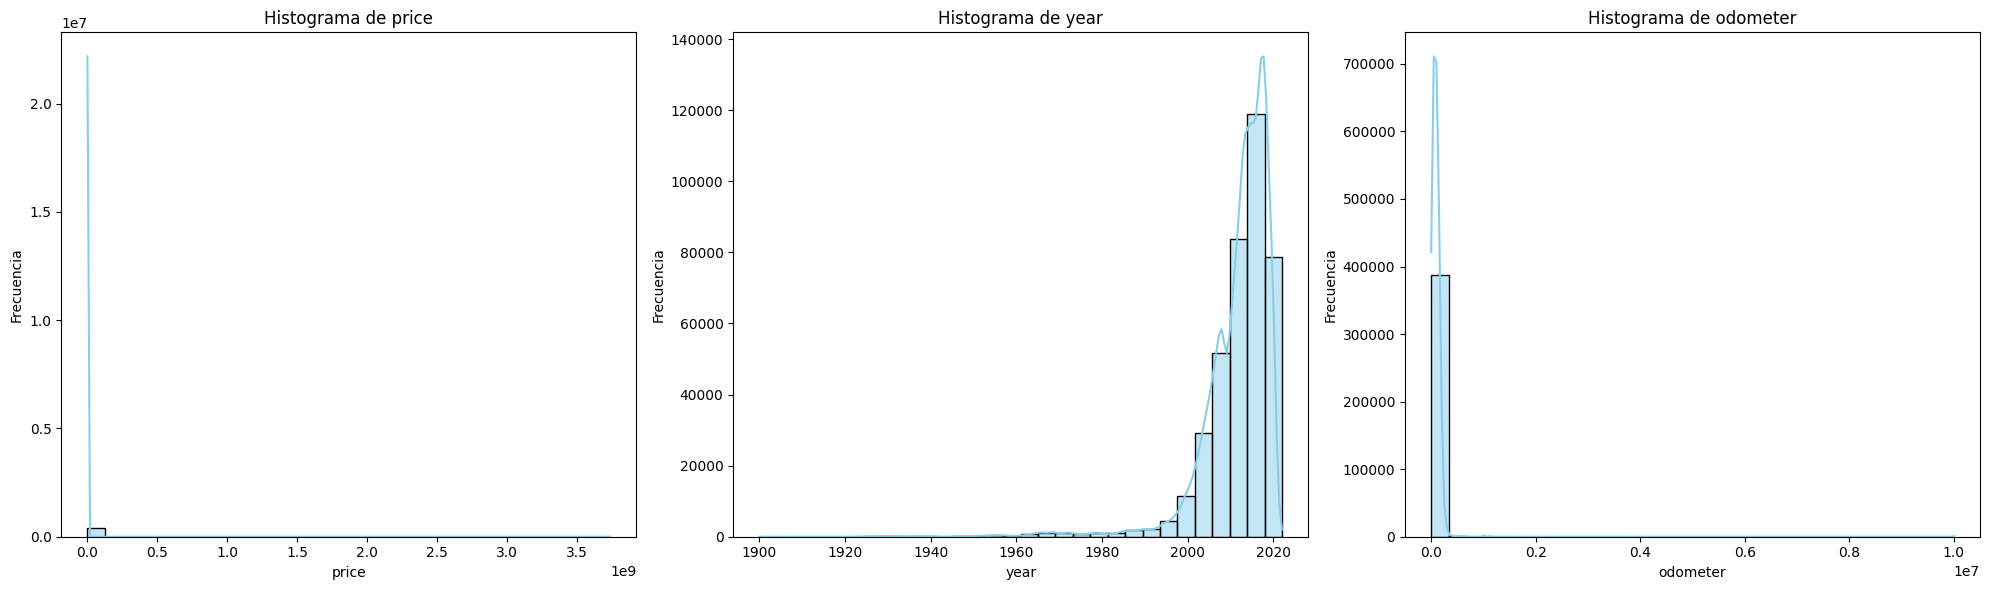

In [22]:
variables_interes = ['price', 'year', 'odometer']

plt.figure(figsize=(20, 6))

for i, column in enumerate(variables_interes):
    plt.subplot(1, 3, i + 1)
    sns.histplot(cars_df_clean_2[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Análisis:**

Las variables presentan un fuerte sesgo, en el caso de `price` y `odometer` tienen un sesgo positivo, mientras que `year` presenta un sesgo a la izquierda.

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [23]:
import datetime
cars_df_clean_2['age'] = datetime.datetime.now().year - cars_df_clean_2['year']
cars_df_clean_2 = cars_df_clean_2.drop(columns=['year'])

<ipython-input-23-d47351a2c534>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df_clean_2['age'] = datetime.datetime.now().year - cars_df_clean_2['year']


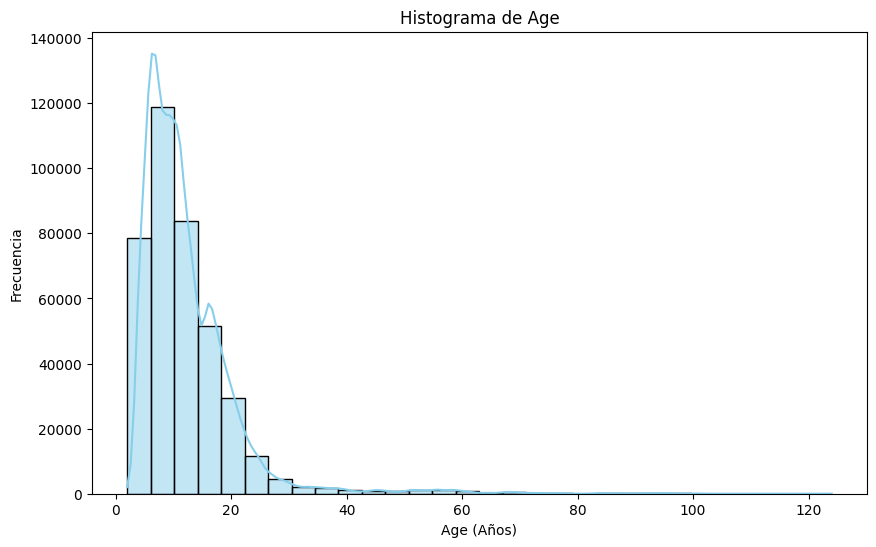

In [24]:
# Generar el histograma de la nueva variable 'age'
plt.figure(figsize=(10, 6))
sns.histplot(cars_df_clean_2['age'], bins=30, kde=True, color='skyblue')
plt.title('Histograma de Age')
plt.xlabel('Age (Años)')
plt.ylabel('Frecuencia')
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

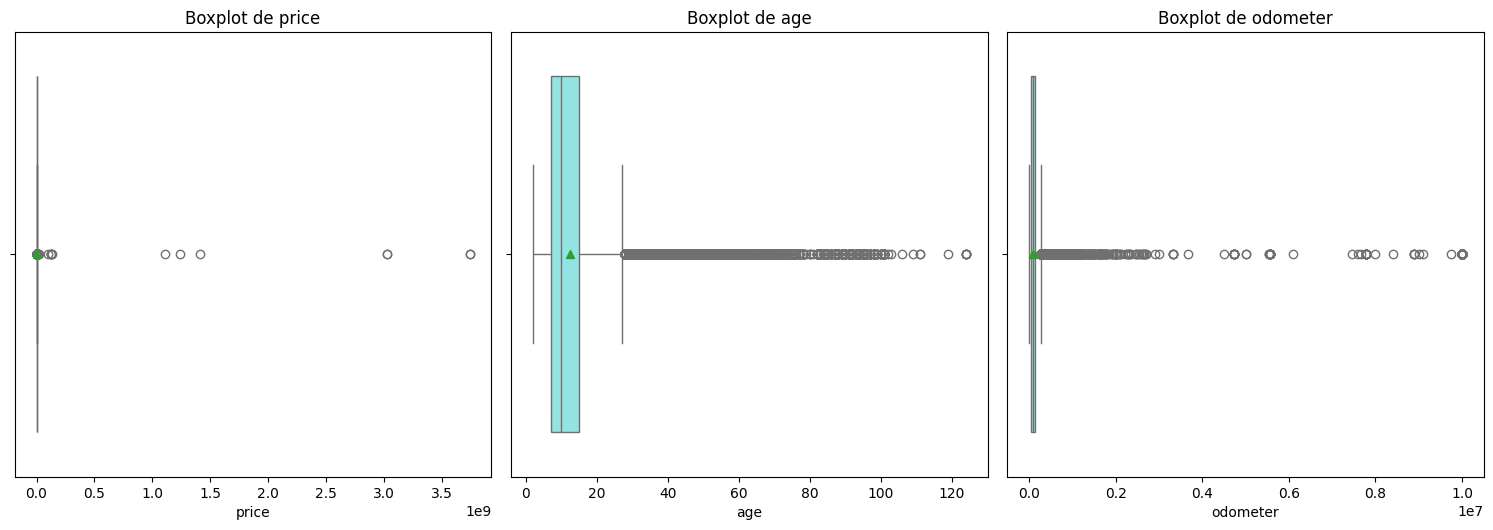

In [25]:
numeric_columns = ['price', 'age', 'odometer']

plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=cars_df_clean_2[column], showmeans=True, color="#84F1EE")
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [26]:
def remove_outliers_iqr(df, column):
    percentile_25 = df[column].quantile(0.25)
    percentile_75 = df[column].quantile(0.75)
    iqr = percentile_75 - percentile_25
    upper_limit = percentile_75 + 1.5 * iqr
    lower_limit = percentile_25 - 1.5 * iqr

    # Identificar outliers
    IQR_outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    # Filtrar DataFrame sin outliers
    df_clean = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

    return IQR_outliers, df_clean

In [27]:
cars_df_clean_2_original = cars_df_clean_2.copy()
removed_count = 0

In [28]:
for column in ['price', 'age', 'odometer']:
    outliers, cars_df_clean_2 = remove_outliers_iqr(cars_df_clean_2, column)
    outlier_count = outliers.shape[0]
    removed_count += outlier_count
    percentage_outliers = (outlier_count / cars_df_clean_2_original.shape[0]) * 100
    print(f"Porcentaje de outliers en {column}: {percentage_outliers:.2f}%")

Porcentaje de outliers en price: 1.71%
Porcentaje de outliers en age: 3.02%
Porcentaje de outliers en odometer: 0.71%


In [29]:
total_removed_percentage = (removed_count / cars_df_clean_2_original.shape[0]) * 100
print(f"\nPorcentaje total de registros eliminados: {total_removed_percentage:.2f}%")


Porcentaje total de registros eliminados: 5.43%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

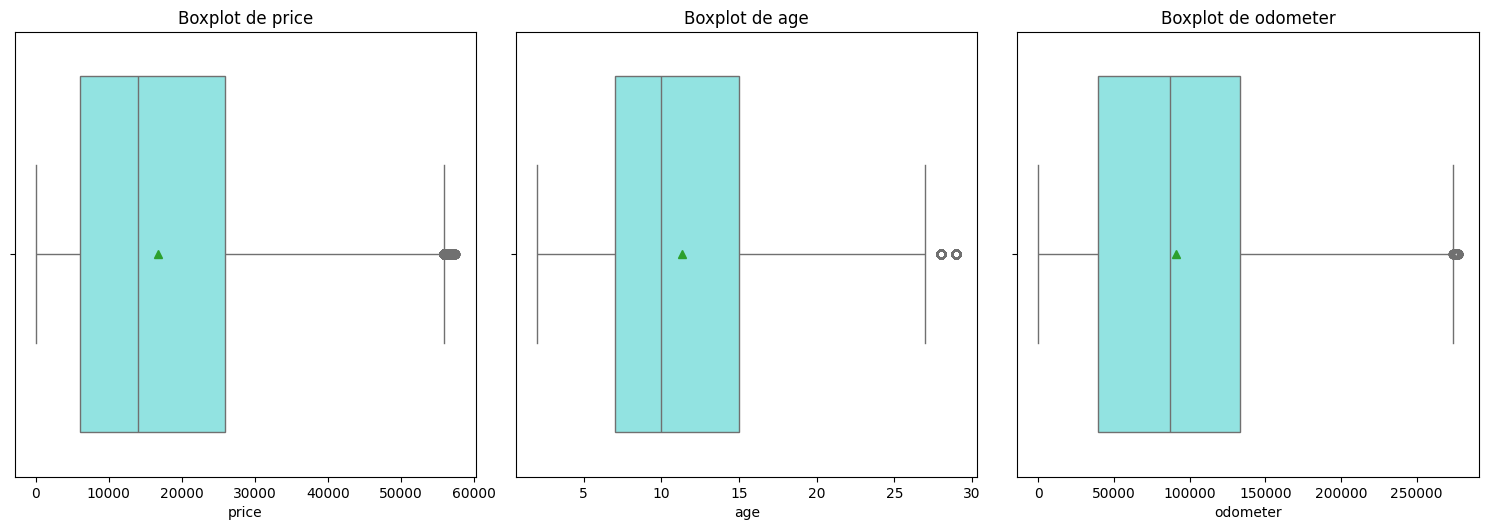

In [30]:
numeric_columns = ['price', 'age', 'odometer']

plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=cars_df_clean_2[column], showmeans=True, color="#84F1EE")
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

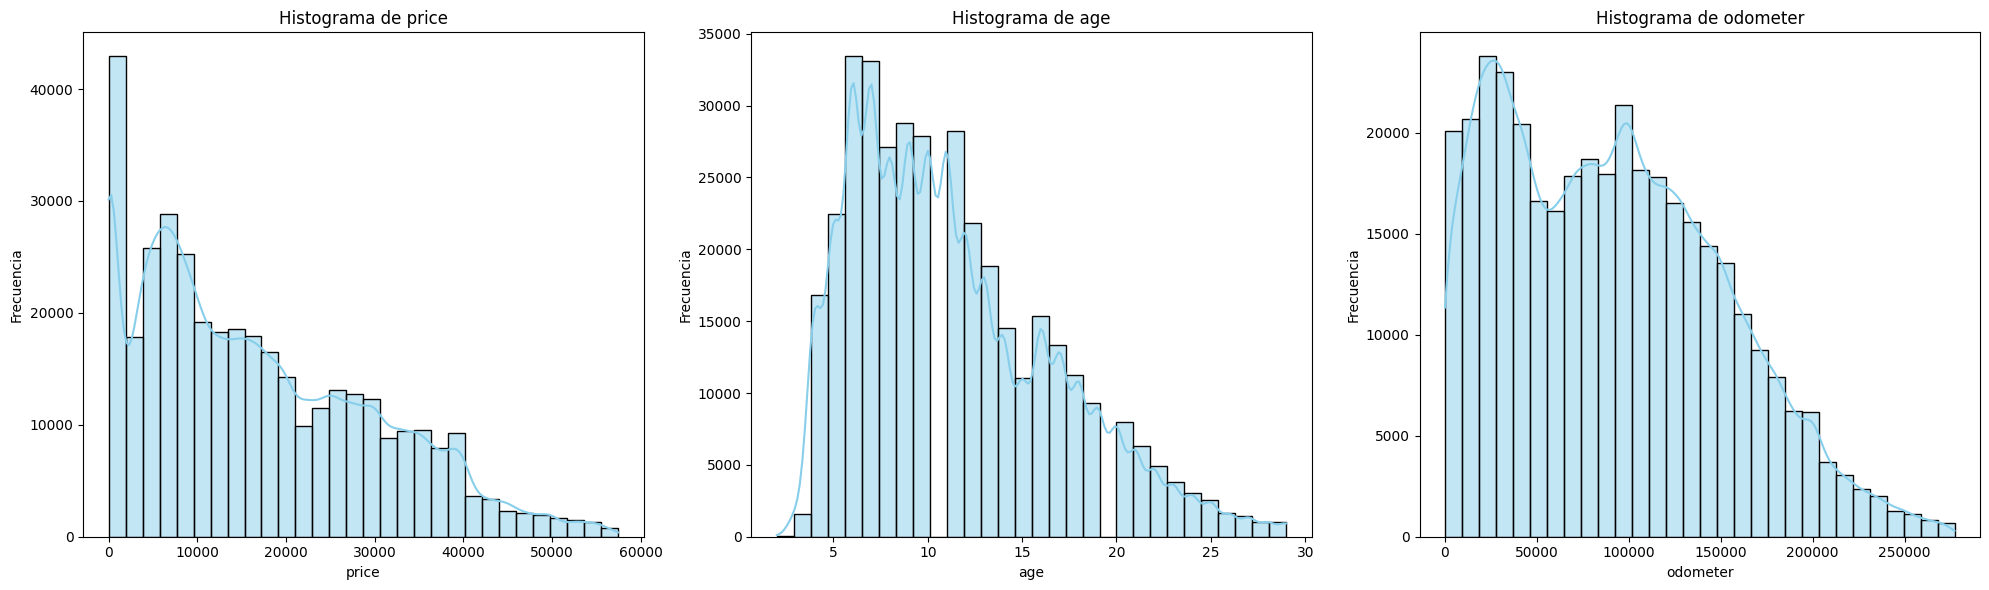

In [31]:
numeric_columns = ['price', 'age', 'odometer']

plt.figure(figsize=(20, 6))

for i, column in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(cars_df_clean_2[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [32]:
def make_qqplot(df, variables):
    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i, var in enumerate(variables):
        ax = plt.subplot(2, 3, i + 1)
        stats.probplot(df[var], dist="norm", plot=plt)
        ax.set_title(var)
    plt.show()

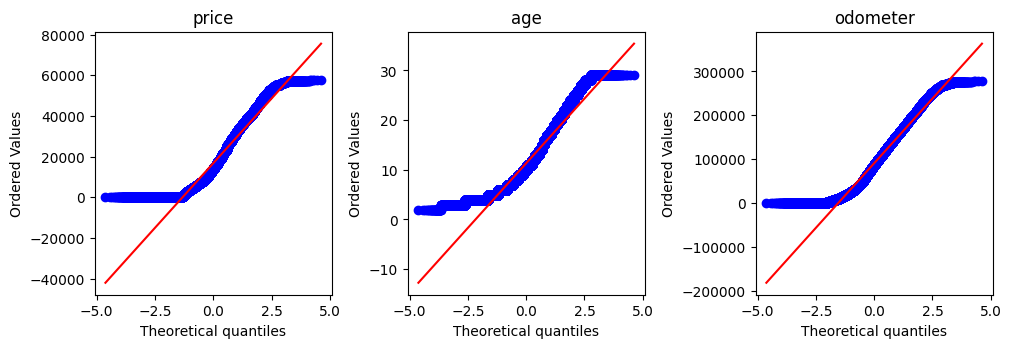

In [33]:
variables_interes = ['price', 'age', 'odometer']
make_qqplot(cars_df_clean_2, variables_interes)

**Análisis:**
Observamos que las variables no siguen una distribución normal, y presenta desviaciones.

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [34]:
from sklearn.preprocessing import PowerTransformer
variables_interes = ['price', 'age', 'odometer']
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
transformed_data = transformer.fit_transform(cars_df_clean_2[variables_interes])

In [35]:
transformed_df = pd.DataFrame(transformed_data, columns=variables_interes)
transformed_df.head()

,price,age,odometer
0,193.563980,2.387911,625.632001
1,163.225489,2.695321,698.226485
2,207.706309,1.604936,347.483442
3,186.983245,2.071931,521.567174
4,136.831542,2.474186,952.940342


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

In [36]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()

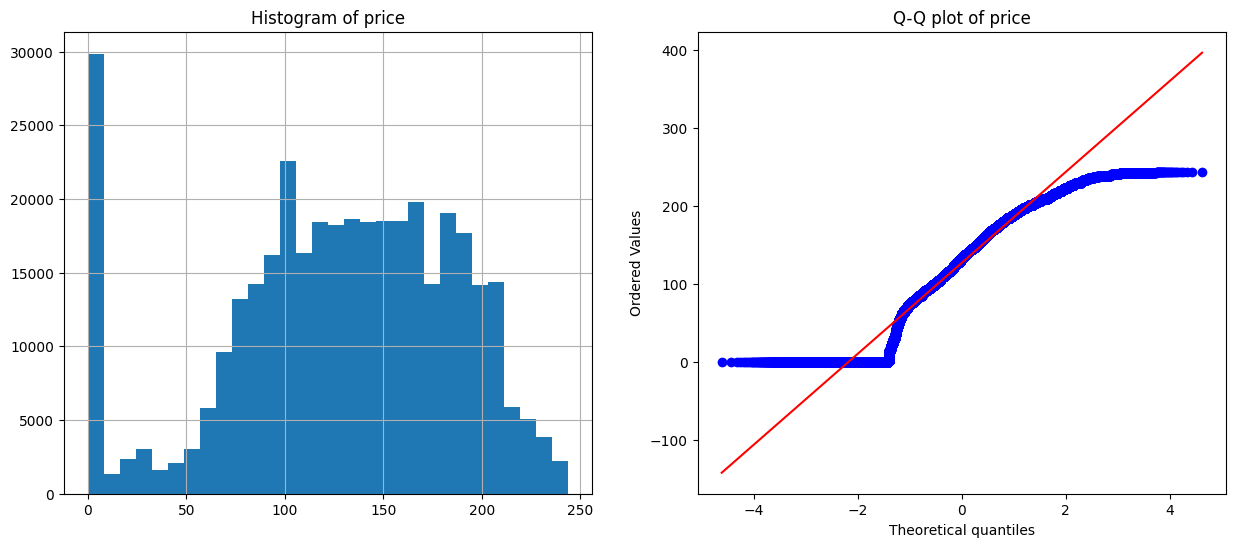

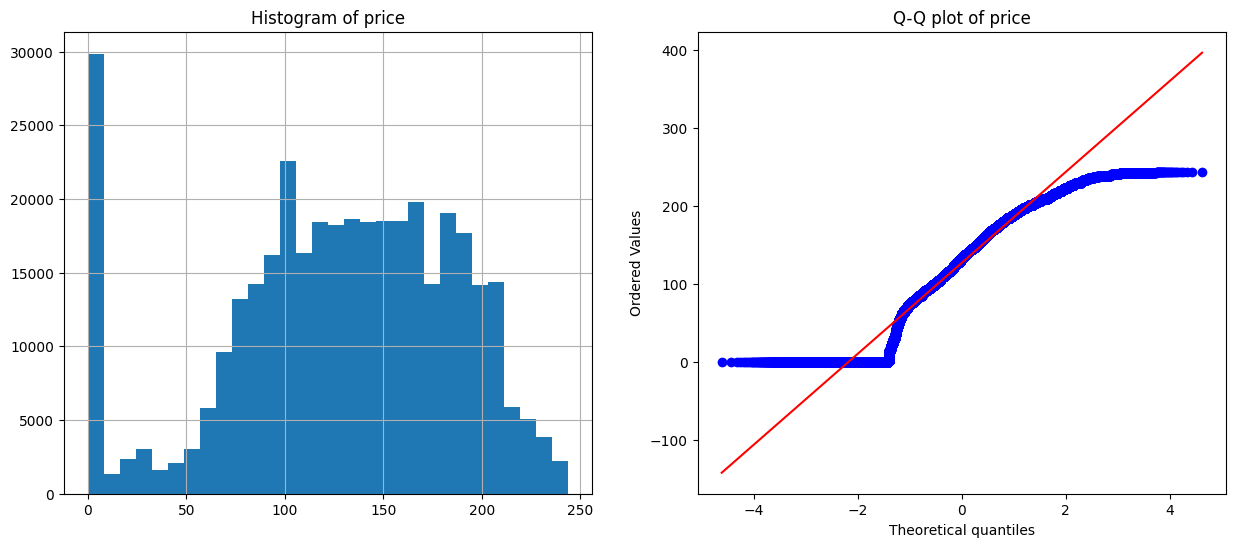

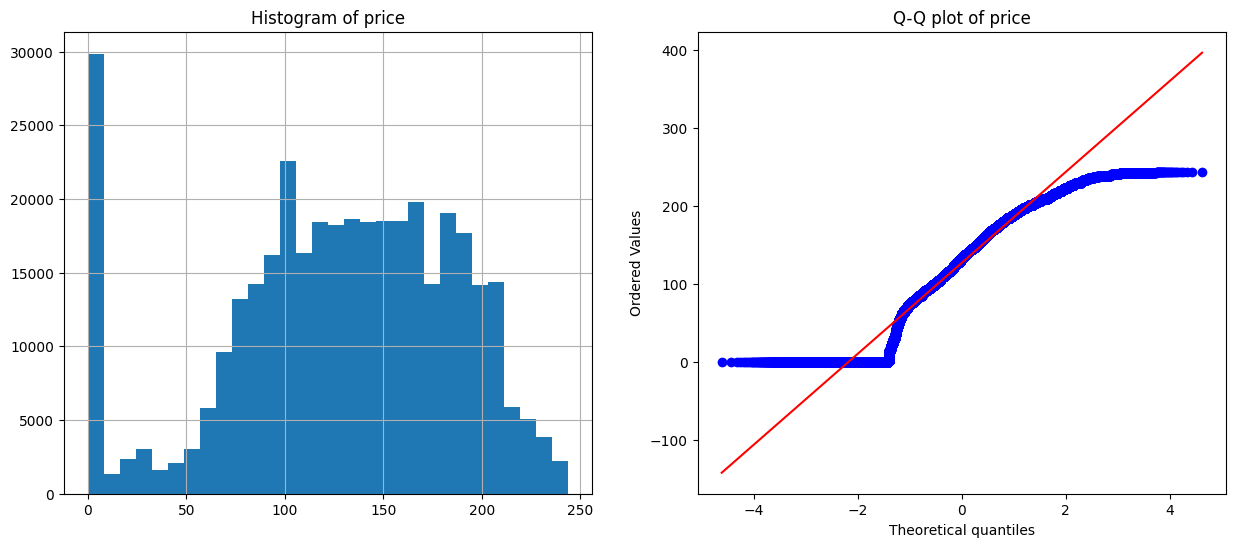

In [37]:
for i, column in enumerate(transformed_df):
    diagnostic_plots(transformed_df, 'price')

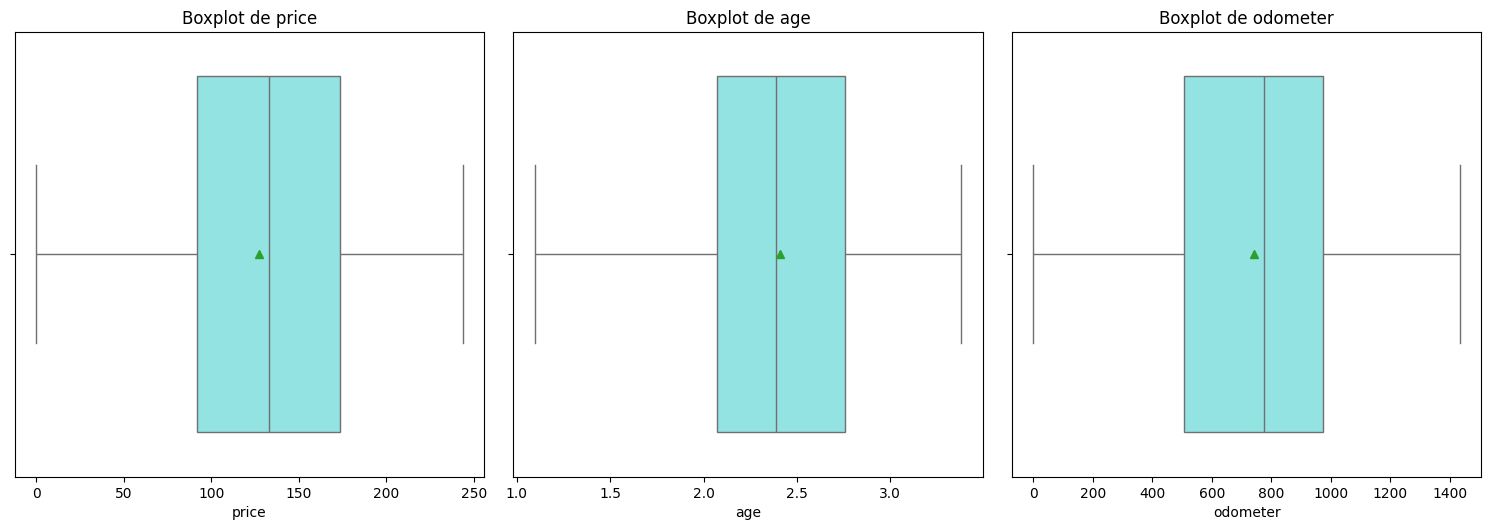

In [38]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(transformed_df):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=transformed_df[column], showmeans=True, color="#84F1EE")
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(transformed_df)
minmax_df = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out())

6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

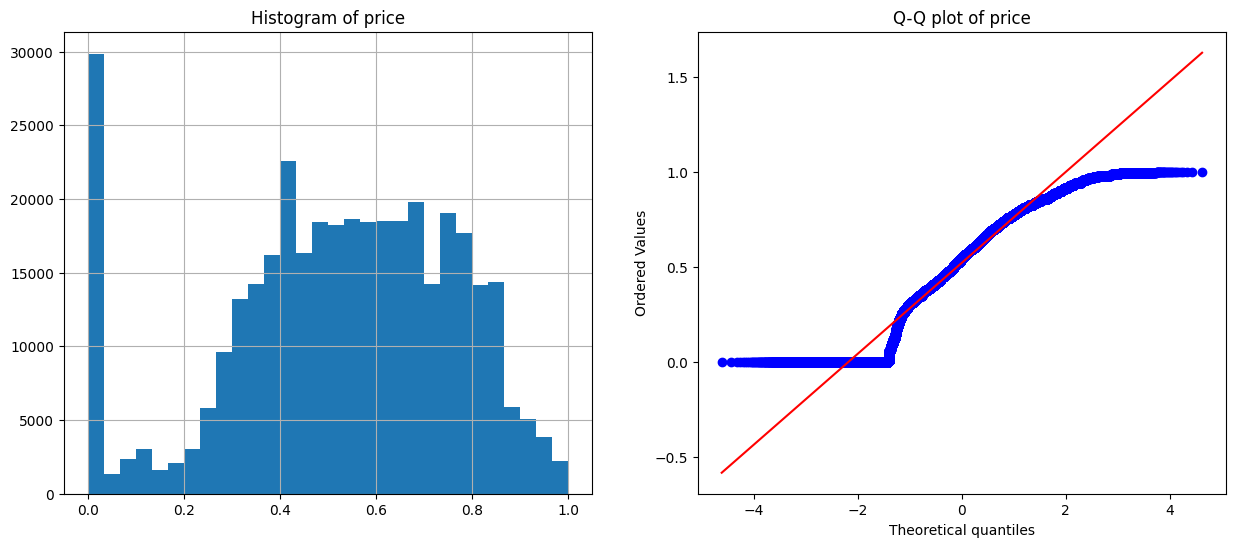

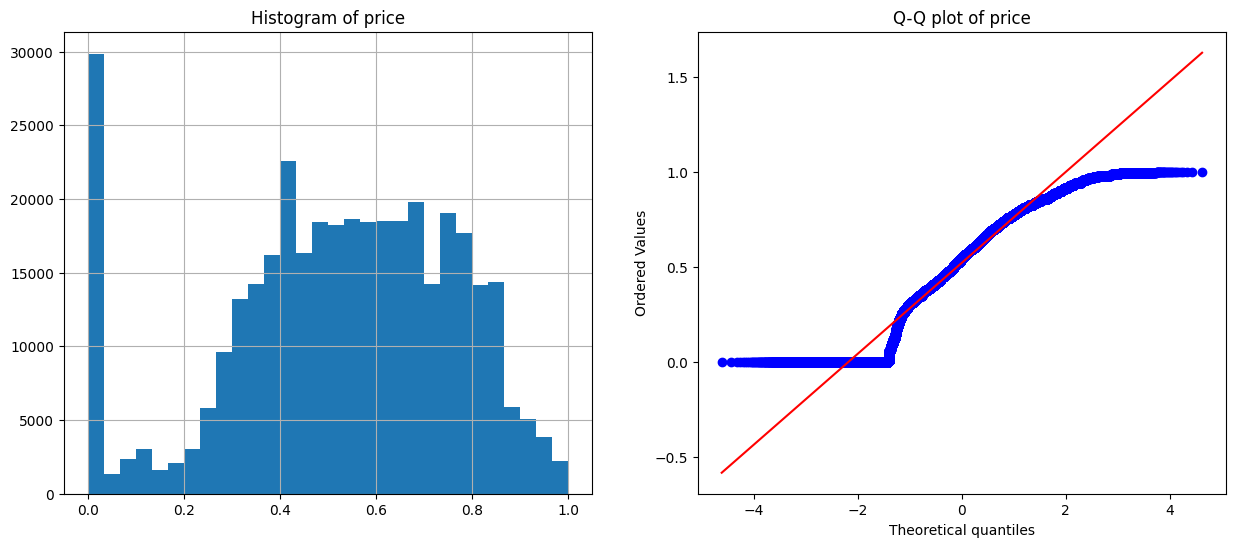

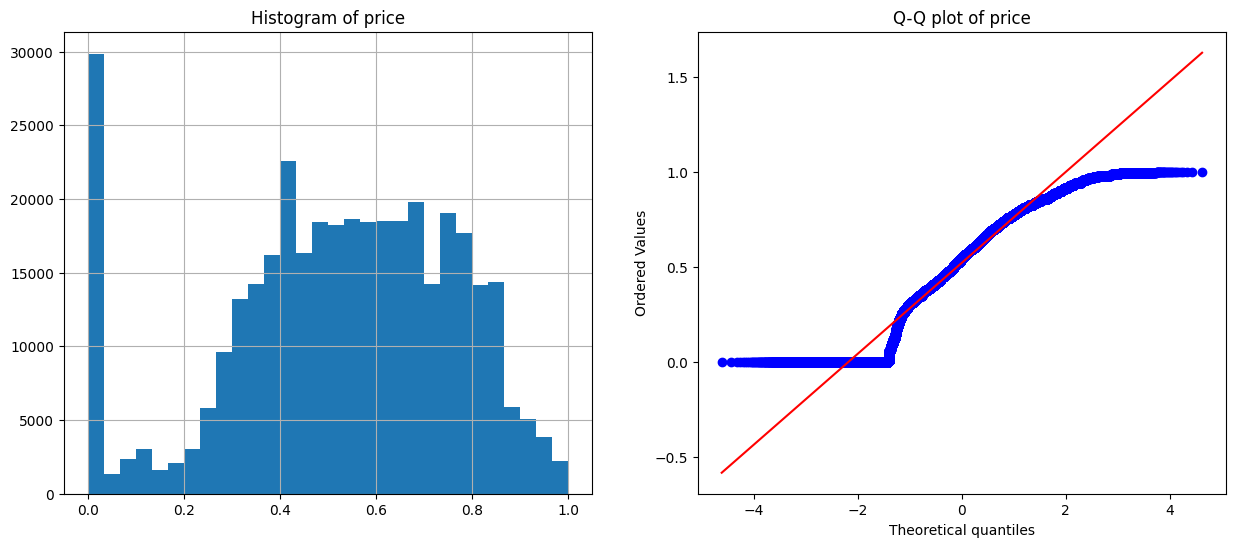

In [41]:
for i, column in enumerate(minmax_df):
    diagnostic_plots(minmax_df, 'price')

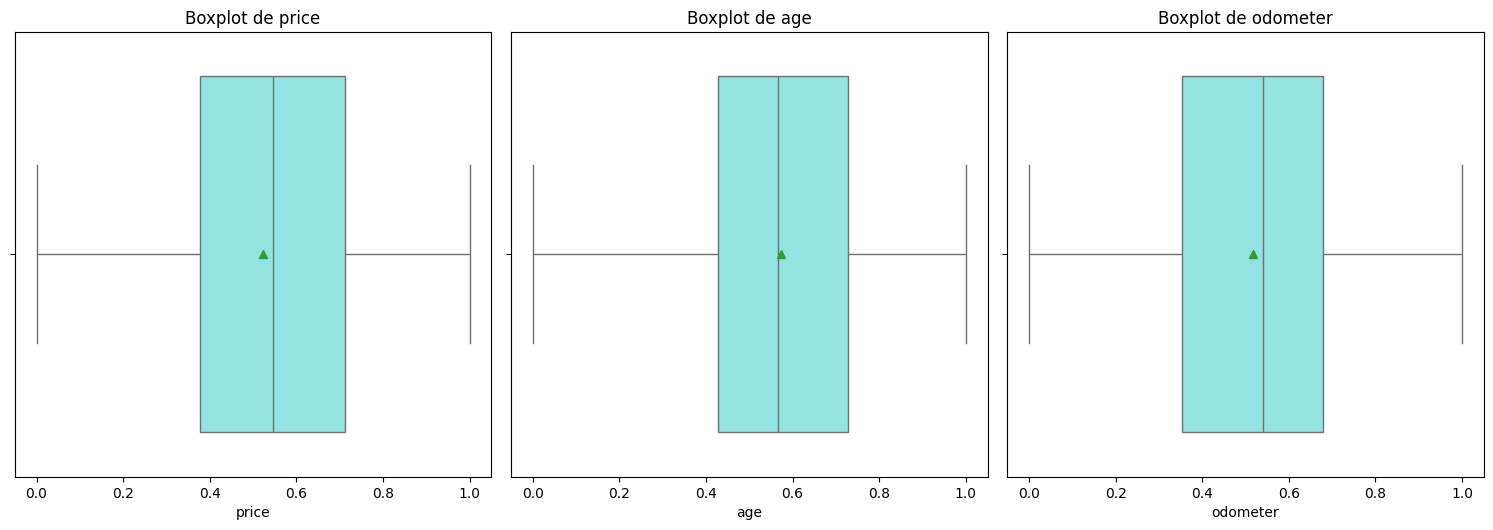

In [42]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(minmax_df):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=minmax_df[column], showmeans=True, color="#84F1EE")
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [43]:
# Estadísticas descriptivas de las variables de texto
cars_df_clean_2.describe(include='object').T

,count,unique,top,freq
region,368433,404,columbus,3201
region_url,368433,413,https://grandrapids.craigslist.org,2745
manufacturer,368433,40,ford,62162
model,368433,19314,f-150,7477
fuel,368433,5,gas,313944
title_status,368433,6,clean,356757
transmission,368433,3,automatic,293338
type,368433,13,sedan,155206
state,368433,51,ca,42333


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [44]:
highly_cardinal_variables = cars_df_clean_2[['region','region_url','model']].copy()
few_cardinal_variables = cars_df_clean_2[['manufacturer','fuel','title_status','transmission','type','state']].copy()

In [45]:
highly_cardinal_variables.head()

,region,region_url,model
27,auburn,https://auburn.craigslist.org,sierra 1500 crew cab slt
28,auburn,https://auburn.craigslist.org,silverado 1500
29,auburn,https://auburn.craigslist.org,silverado 1500 crew
30,auburn,https://auburn.craigslist.org,tundra double cab sr
31,auburn,https://auburn.craigslist.org,f-150 xlt


In [46]:
few_cardinal_variables.head()

,manufacturer,fuel,title_status,transmission,type,state
27,gmc,gas,clean,other,pickup,al
28,chevrolet,gas,clean,other,pickup,al
29,chevrolet,gas,clean,other,pickup,al
30,toyota,gas,clean,other,pickup,al
31,ford,gas,clean,automatic,truck,al


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

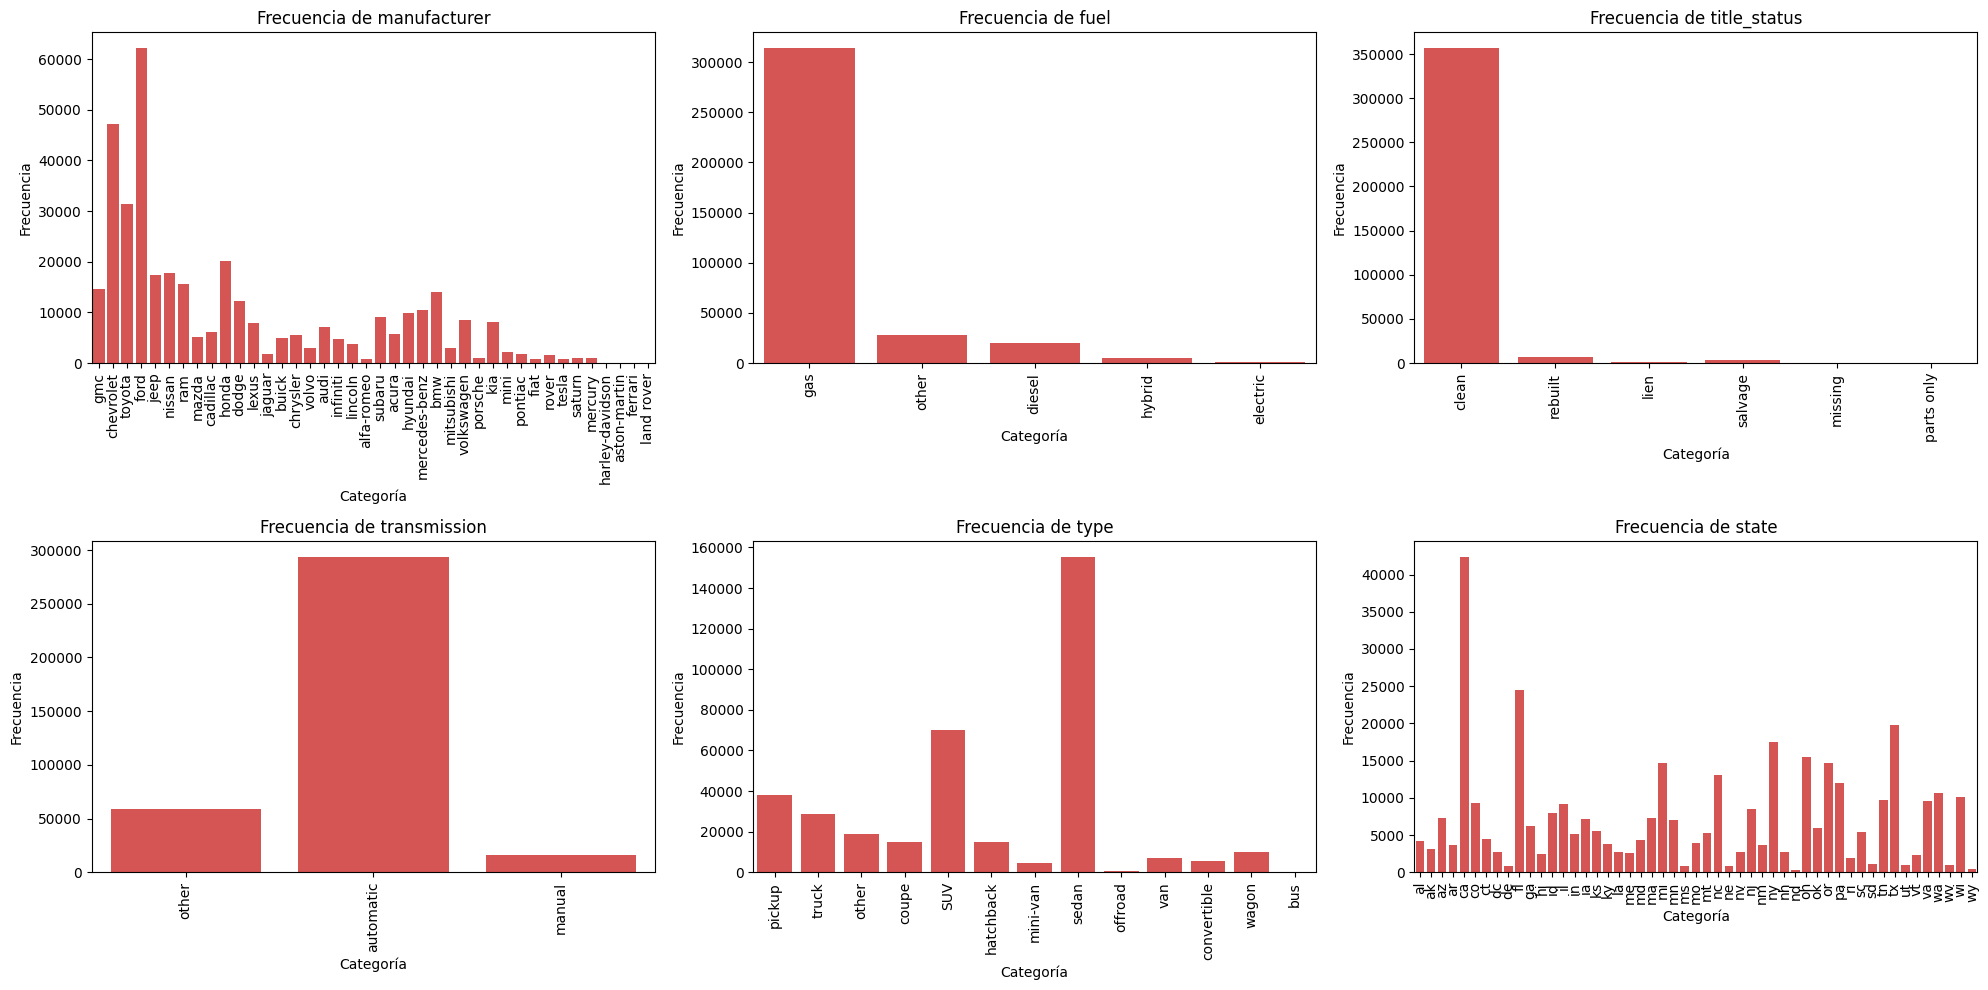

In [47]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(few_cardinal_variables):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=few_cardinal_variables[column], color="#E60E0E", alpha=0.8)

    plt.title(f"Frecuencia de {column}")
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(few_cardinal_variables)
onehot_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(few_cardinal_variables.columns))

In [49]:
onehot_df.head()

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [50]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

In [51]:
encoder = BinaryEncoder()
encoded_data = encoder.fit_transform(highly_cardinal_variables)
binary_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

In [52]:
binary_df.head()

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [53]:
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

In [54]:
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)

In [55]:
final_df.head()

,price,age,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794413,0.565257,0.435888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.669900,0.699813,0.486465,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.852455,0.222541,0.242097,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.767405,0.426949,0.363384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.561575,0.603020,0.663928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
